# Extract Frames from Video

In [205]:
#
##
import torchvision
#
## define video to extract frames from
var_path_video = "/data/hwang/Lab/Project/WiMans/dataset/video/act_49_41.mp4"
var_name = var_path_video.split("/")[-1].split(".")[0]
#
## define frames to extract
var_frame_index = list(range(0, 90, 1))
print(var_name, var_frame_index)

act_49_41 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [206]:
#
## read video
data_frame, _, var_info = torchvision.io.read_video(var_path_video)
data_frame.shape

/home/hwang/anaconda3/envs/WiMans/lib/python3.9/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([90, 1080, 1920, 3])

In [56]:
#
##
for var_i in var_frame_index:
    #
    data_image = data_frame[var_i].permute(2, 0, 1)
    #
    torchvision.io.write_jpeg(data_image, var_name + "_" + str(var_i) + ".jpg", 100)


# Visualize WiFi CSI

In [2]:
import os
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [3]:
#
##
var_path_mat = "/data/hwang/Lab/Project/WiMans/dataset/csi/mat/act_49_41.mat"
data_mat = scio.loadmat(var_path_mat)

In [11]:
#
##
var_length = data_mat["trace"].shape[0]
#
## 
data_csi_amp = []
for var_t in range(var_length):
    data_csi_amp.append(abs(data_mat["trace"][var_t][0][0][0][-1]))
#
data_csi_amp = np.array(data_csi_amp, dtype = np.float32)
#
print(data_csi_amp.shape)

(2757, 3, 3, 30)


(2757, 270)


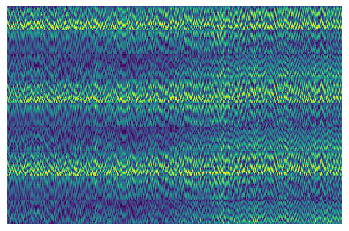

In [12]:
#
##
data_csi_show = abs(data_csi_amp.reshape(data_csi_amp.shape[0], -1))
print(data_csi_show.shape)
#
##
data_csi_show = np.transpose(data_csi_show)
var_x_encoder = MinMaxScaler() 
data_csi_show = var_x_encoder.fit_transform(data_csi_show)
data_csi_show = np.transpose(data_csi_show)
#
##
var_f, _ = plt.subplots(1, 1)
plt.axis("off")
var_image = plt.imshow(data_csi_show.T, interpolation = "none", aspect = "auto", cmap = "viridis")

In [307]:
var_name = var_path_mat.split("/")[-1].split(".")[0]
var_f.savefig(var_name + ".png", bbox_inches = "tight", pad_inches = 0, dpi = 600)